In [10]:
!pip install underthesea

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20.9/20.9 MB 82.4 MB/s eta 0:00:00:00:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 657.8/657.8 kB 37.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 57.1 MB/s eta 0:00:00


In [11]:
!pip install langdetect


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 981.5/981.5 kB 18.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=3f7e705f8d59a824244f1045298fc5a6ba802cf1584c91fdbd5afd6214e305a1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer, DataCollatorWithPadding, Trainer, TrainingArguments, AutoModelForSequenceClassification
from underthesea import word_tokenize
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from underthesea import word_tokenize

plt.style.use('ggplot')

import nltk

Prepare data


In [14]:
df = pd.read_csv('/kaggle/input/comments-dataset/comments.csv')
print(df.shape)


(5650, 7)


In [34]:
import pandas as pd
from langdetect import detect

# ƒê·ªçc d·ªØ li·ªáu (gi·∫£ s·ª≠ file CSV c√≥ c·ªôt 'comment' ch·ª©a vƒÉn b·∫£n)
df = pd.read_csv("/kaggle/input/comments-dataset/comments.csv")

# H√†m x√°c ƒë·ªãnh ng√¥n ng·ªØ
def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return "unknown"

# √Åp d·ª•ng h√†m ƒë·ªÉ x√°c ƒë·ªãnh ng√¥n ng·ªØ
df["language"] = df["description"].apply(detect_language)

# Chia d·ªØ li·ªáu th√†nh ti·∫øng Vi·ªát v√† ti·∫øng Anh
df_vi = df[df["language"] == "vi"]
df_en = df[df["language"] == "en"]

# L∆∞u l·∫°i th√†nh c√°c file ri√™ng bi·ªát
df_vi.to_csv("comments_vi.csv", index=False)
df_en.to_csv("comments_en.csv", index=False)

print(f"S·ªë l∆∞·ª£ng comment ti·∫øng Vi·ªát: {len(df_vi)}")
print(f"S·ªë l∆∞·ª£ng comment ti·∫øng Anh: {len(df_en)}")


S·ªë l∆∞·ª£ng comment ti·∫øng Vi·ªát: 5579
S·ªë l∆∞·ª£ng comment ti·∫øng Anh: 34


X·ª≠ l√Ω ti·∫øng vi·ªát


In [36]:
df_vi = pd.read_csv('comments_vi.csv')
print(df_vi.shape)

(5579, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             5579 non-null   object 
 1   userId          5579 non-null   object 
 2   restaurantId    5579 non-null   object 
 3   rate            5579 non-null   float64
 4   time            5579 non-null   object 
 5   title           5579 non-null   object 
 6   description     5579 non-null   object 
 7   language        5579 non-null   object 
 8   sentiment       5579 non-null   object 
 9   cleaned_text    5579 non-null   object 
 10  processed_text  5579 non-null   object 
 11  review_length   5579 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 523.2+ KB
Missing values:
 _id               0
userId            0
restaurantId      0
rate              0
time              0
title             0
description       0
language          0
sentiment         0
c

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


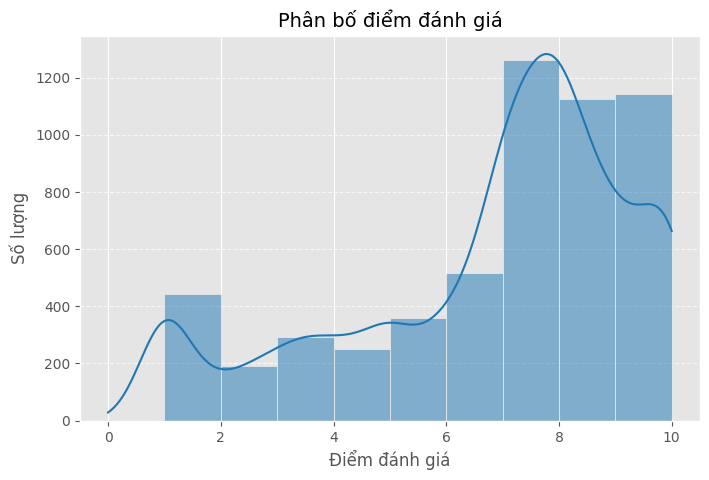

sentiment
positive    3917
negative     961
neutral      701
Name: count, dtype: int64


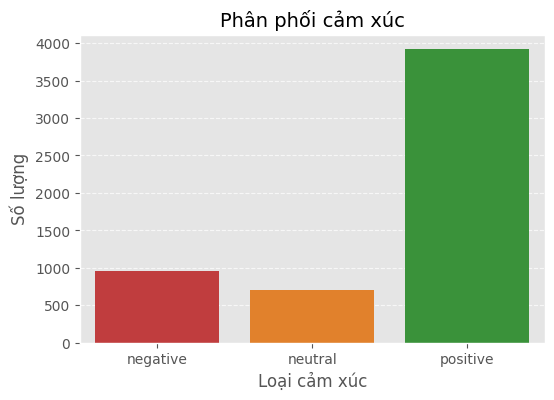

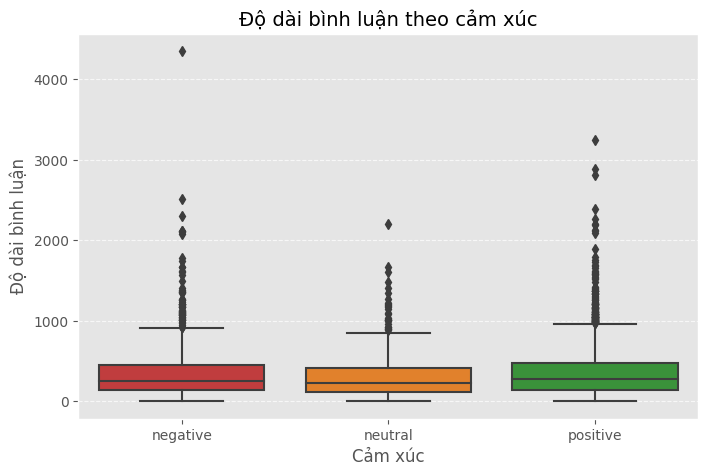

In [67]:
# Ki·ªÉm tra th√¥ng tin d·ªØ li·ªáu
df_vi.info()

# Ki·ªÉm tra d·ªØ li·ªáu b·ªã thi·∫øu
missing_values = df_vi.isnull().sum()
print("Missing values:\n", missing_values)

# Hi·ªÉn th·ªã th·ªëng k√™ m√¥ t·∫£ c·ªßa ƒëi·ªÉm ƒë√°nh gi√°
print(df_vi['rate'].describe())

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n b·ªë ƒëi·ªÉm ƒë√°nh gi√°
plt.figure(figsize=(8, 5))
sns.histplot(df_vi['rate'], bins=10, kde=True, color='#1f77b4')  # M√†u xanh ƒë·∫≠m
plt.title('Ph√¢n b·ªë ƒëi·ªÉm ƒë√°nh gi√°', fontsize=14)
plt.xlabel('ƒêi·ªÉm ƒë√°nh gi√°', fontsize=12)
plt.ylabel('S·ªë l∆∞·ª£ng', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Chuy·ªÉn ƒë·ªïi ƒëi·ªÉm ƒë√°nh gi√° th√†nh c·∫£m x√∫c
def convert_rating_to_label(rating):
    if rating <= 4:
        return "negative"
    elif rating <= 6:
        return "neutral"
    else:
        return "positive"

df_vi["sentiment"] = df_vi["rate"].apply(convert_rating_to_label)
print(df_vi["sentiment"].value_counts())

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c·∫£m x√∫c v·ªõi m√†u s·∫Øc n·ªïi b·∫≠t
plt.figure(figsize=(6, 4))
sns.countplot(data=df_vi, x='sentiment', palette=['#d62728', '#ff7f0e', '#2ca02c'])  # ƒê·ªè, cam, xanh l√°
plt.title('Ph√¢n ph·ªëi c·∫£m x√∫c', fontsize=14)
plt.xlabel('Lo·∫°i c·∫£m x√∫c', fontsize=12)
plt.ylabel('S·ªë l∆∞·ª£ng', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# T√≠nh ƒë·ªô d√†i c·ªßa m·ªói b√¨nh lu·∫≠n
df_vi['review_length'] = df_vi['description'].astype(str).apply(len)

# So s√°nh ƒë·ªô d√†i b√¨nh lu·∫≠n gi·ªØa c√°c nh√≥m c·∫£m x√∫c
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_vi, x='sentiment', y='review_length', palette=['#d62728', '#ff7f0e', '#2ca02c'])
plt.title('ƒê·ªô d√†i b√¨nh lu·∫≠n theo c·∫£m x√∫c', fontsize=14)
plt.xlabel('C·∫£m x√∫c', fontsize=12)
plt.ylabel('ƒê·ªô d√†i b√¨nh lu·∫≠n', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [39]:
# Chuy·ªÉn ƒë·ªïi rating th√†nh 3 l·ªõp c·∫£m x√∫c
def convert_rating_to_label(rating):
    if rating <= 4:
        return "negative"
    elif rating <= 6:
        return "neutral"
    else:
        return "positive"

In [41]:
df_vi["sentiment"] = df_vi["rate"].apply(convert_rating_to_label)

In [42]:
df_vi.head()

_id                    userId  \
0  678136022e6c6fe7a4d962d5  67812080426d11b58b7f04cb   
1  678136022e6c6fe7a4d962d6  67812080426d11b58b7f0524   
2  678136022e6c6fe7a4d962d7  67812080426d11b58b7f0412   
3  678136022e6c6fe7a4d962d8  67812080426d11b58b7f060a   
4  678136022e6c6fe7a4d962d9  67812080426d11b58b7f062c   

               restaurantId  rate             time  \
0  67812ec1514dba6089ed92ac   3.0  28/6/2024 15:07   
1  67812ec1514dba6089ed92ac   1.0  14/1/2024 18:41   
2  67812ec1514dba6089ed92ac   6.0  9/10/2023 18:54   
3  67812ec1514dba6089ed92ac   9.4   8/8/2022 22:15   
4  67812ec1514dba6089ed92ac   7.0   22/9/2021 9:55   

                                               title  \
0                                         Cua qu√° d·ª°   
1  ƒë·ªì ƒÉn r·∫•t t·ªá , kh√¥ng bi√™t c√≥ ƒë√∫ng ti·ªám kh√¥ng? ...   
2                            Mi·∫øn Cua 94 - Ch√≠nh G·ªëc   
3                            Mi·∫øn Cua 94 - Ch√≠nh G·ªëc   
4                                   Ch·∫£ gi√≤ m√πa d·ªãch   

                                         description language sentiment  
0  Mua h·ªôp c∆°m x√†o cua ƒÉn m√† th·∫•y cua ko dc t∆∞∆°i,...       vi  negative  
1                                       D·ªì ƒÉn qu√° t·ªá       vi  negative  
2               C∆°m x√†o cua nhi·ªÅu cua ngon ƒë√°ng ti·ªÅn       vi   neutral  
3  Nh√¨n qu√°n kh√° h·∫•p d·∫´n, c√≥ d·ªãp m√¨nh s·∫Ω gh√© l·∫°i ...       vi  positive  
4  Sau 1 th·ªùi gian gi√£n c√°ch m√¨nh ƒë·∫∑t m√≥n t·∫°i ti·ªá...       vi  positive

Tokenization PhoBert


In [43]:
# Load PhoBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2", use_fast=False)

config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

In [44]:
# X·ª≠ l√Ω stopwords
stopwords = {"a", "√†", "√°", "ai", "anh", "b·∫°n", "b·ªüi", "c·∫£", "c√°i", "c√°c", "c√≥", "c√πng", "c·ª©", "c·ªßa", "c≈©ng", "d∆∞·ªõi", "ƒë√£", "ƒëang", "ƒë√¢y", "ƒë√†nh", "ƒë·ªÉ", "ƒë·∫øn", "ƒë√≥", "ƒë√¢y", "ƒë·∫•y"}
def remove_stopwords(text):
    words = word_tokenize(text, format="text").split()
    return " ".join([word for word in words if word not in stopwords])

In [45]:
# X·ª≠ l√Ω ph·ªß ƒë·ªãnh
def handle_negation(text):
    words = text.split()
    negations = {
        "kh√¥ng", "ch∆∞a", "ch·∫≥ng", "ch·∫£", "ƒë·ª´ng", "kh√¥ng h·ªÅ", "ƒë√¢u c√≥",
        "ch·∫≥ng h·ªÅ", "ch·∫≥ng bao gi·ªù", "kh√¥ng ph·∫£i", "kh√¥ng bao gi·ªù",
        "kh√¥ng ƒë·ªùi n√†o", "ƒë√¢u ph·∫£i", "ƒë√¢u c√≥ ph·∫£i", "kh√¥ng bao gi·ªù c√≥", "kh√¥ng th·ªÉ n√†o",
        "kh√¥ng th·ªÉ", "kh√¥ng d·ªÖ", "ch·∫≥ng th·ªÉ", "ƒë√¢u c√≥ th·ªÉ", "ƒë√¢u d·ªÖ", "kh√¥ng c√°ch n√†o",
        "kh√¥ng d√°m", "kh√¥ng n√™n", "kh√¥ng ƒë∆∞·ª£c", "kh√¥ng mu·ªën", "ƒë√¢u c·∫ßn",
        "kh√¥ng c·∫ßn", "ch∆∞a c·∫ßn", "kh√¥ng mong", "kh√¥ng ∆∞·ªõc", "ch·∫≥ng th√≠ch",
        "kh√¥ng c√≥", "ƒë√¢u c√≥", "kh√¥ng c√≤n", "ch∆∞a c√≥", "ch·∫≥ng c√≥", "ƒë√¢u c√≤n",
        "kh√¥ng ƒë√°ng", "ch·∫≥ng ƒë√°ng", "ƒë√¢u ƒë√°ng", "kh√¥ng h·ª£p", "kh√¥ng ƒë√∫ng",
        "ch·∫≥ng ƒë√∫ng", "ch∆∞a ch·∫Øc", "kh√¥ng th√≠ch h·ª£p", "ch·∫≥ng ph√π h·ª£p",
        "kh√¥ng ƒë·ªß", "ch∆∞a ƒë·ªß", "ƒë√¢u ƒë·ªß", "kh√¥ng ƒë·∫°t", "ch∆∞a ƒë·∫°t", "kh√¥ng t∆∞∆°ng x·ª©ng",
        "ch∆∞a t·ª´ng", "ch∆∞a bao gi·ªù", "kh√¥ng khi n√†o", "kh√¥ng m·ªôt l·∫ßn n√†o", "ƒë√¢u c√≥ l√∫c n√†o",
        "kh√¥ng vui", "kh√¥ng h√†i l√≤ng", "kh√¥ng h·∫°nh ph√∫c", "kh√¥ng tho·∫£i m√°i",
        "kh√¥ng ph·∫£i l·ªói c·ªßa t√¥i", "ƒë√¢u c√≥ l·ªói", "kh√¥ng li√™n quan", "ch·∫≥ng ph·∫£i do t√¥i",
        "kh√¥ng ƒë√∫ng s·ª± th·∫≠t", "kh√¥ng ph·∫£i s·ª± th·∫≠t", "kh√¥ng c√≥ ch·ª©ng c·ª©",
        "kh√¥ng ch·∫Øc ch·∫Øn", "ch∆∞a ch·∫Øc ƒë√∫ng", "ch∆∞a kh·∫≥ng ƒë·ªãnh",
        "kh√¥ng c√≥ g√¨ thay ƒë·ªïi", "kh√¥ng h·ªÅ thay ƒë·ªïi", "kh√¥ng c·∫£i thi·ªán",
        "kh√¥ng ƒë·∫£m b·∫£o", "kh√¥ng cam k·∫øt", "kh√¥ng ch·∫Øc ƒë√¢u",
    }
    processed_words = []
    skip = False
    for i in range(len(words)):
        if skip:
            skip = False
            continue
        if words[i] in negations and i < len(words) - 1:
            processed_words.append(words[i] + "_" + words[i + 1])
            skip = True
        else:
            processed_words.append(words[i])
    return " ".join(processed_words)


In [46]:
# Ti·ªÅn x·ª≠ l√Ω vƒÉn b·∫£n
df_vi["cleaned_text"] = df_vi["description"].apply(remove_stopwords)
df_vi["processed_text"] = df_vi["cleaned_text"].apply(handle_negation)

In [47]:
df_vi.head()

_id                    userId  \
0  678136022e6c6fe7a4d962d5  67812080426d11b58b7f04cb   
1  678136022e6c6fe7a4d962d6  67812080426d11b58b7f0524   
2  678136022e6c6fe7a4d962d7  67812080426d11b58b7f0412   
3  678136022e6c6fe7a4d962d8  67812080426d11b58b7f060a   
4  678136022e6c6fe7a4d962d9  67812080426d11b58b7f062c   

               restaurantId  rate             time  \
0  67812ec1514dba6089ed92ac   3.0  28/6/2024 15:07   
1  67812ec1514dba6089ed92ac   1.0  14/1/2024 18:41   
2  67812ec1514dba6089ed92ac   6.0  9/10/2023 18:54   
3  67812ec1514dba6089ed92ac   9.4   8/8/2022 22:15   
4  67812ec1514dba6089ed92ac   7.0   22/9/2021 9:55   

                                               title  \
0                                         Cua qu√° d·ª°   
1  ƒë·ªì ƒÉn r·∫•t t·ªá , kh√¥ng bi√™t c√≥ ƒë√∫ng ti·ªám kh√¥ng? ...   
2                            Mi·∫øn Cua 94 - Ch√≠nh G·ªëc   
3                            Mi·∫øn Cua 94 - Ch√≠nh G·ªëc   
4                                   Ch·∫£ gi√≤ m√πa d·ªãch   

                                         description language sentiment  \
0  Mua h·ªôp c∆°m x√†o cua ƒÉn m√† th·∫•y cua ko dc t∆∞∆°i,...       vi  negative   
1                                       D·ªì ƒÉn qu√° t·ªá       vi  negative   
2               C∆°m x√†o cua nhi·ªÅu cua ngon ƒë√°ng ti·ªÅn       vi   neutral   
3  Nh√¨n qu√°n kh√° h·∫•p d·∫´n, c√≥ d·ªãp m√¨nh s·∫Ω gh√© l·∫°i ...       vi  positive   
4  Sau 1 th·ªùi gian gi√£n c√°ch m√¨nh ƒë·∫∑t m√≥n t·∫°i ti·ªá...       vi  positive   

                                        cleaned_text  \
0  Mua h·ªôp c∆°m x√†o cua ƒÉn m√† th·∫•y cua ko dc t∆∞∆°i ...   
1                                       D·ªì ƒÉn qu√° t·ªá   
2               C∆°m x√†o_cua nhi·ªÅu cua ngon_ƒë√°ng ti·ªÅn   
3  Nh√¨n qu√°n kh√° h·∫•p_d·∫´n , d·ªãp m√¨nh s·∫Ω gh√© l·∫°i qu...   
4  Sau 1 th·ªùi_gian gi√£n c√°ch m√¨nh ƒë·∫∑t m√≥n t·∫°i ti·ªá...   

                                      processed_text  
0  Mua h·ªôp c∆°m x√†o cua ƒÉn m√† th·∫•y cua ko dc t∆∞∆°i ...  
1                                       D·ªì ƒÉn qu√° t·ªá  
2               C∆°m x√†o_cua nhi·ªÅu cua ngon_ƒë√°ng ti·ªÅn  
3  Nh√¨n qu√°n kh√° h·∫•p_d·∫´n , d·ªãp m√¨nh s·∫Ω gh√© l·∫°i qu...  
4  Sau 1 th·ªùi_gian gi√£n c√°ch m√¨nh ƒë·∫∑t m√≥n t·∫°i ti·ªá...

In [48]:
# Tokenization v·ªõi truncation & padding
tokenized_data = tokenizer.batch_encode_plus(
    df_vi["processed_text"].tolist(),
    padding="max_length",  # Lu√¥n ƒë·∫£m b·∫£o c√πng ƒë·ªô d√†i
    truncation=True,       # C·∫Øt b·ªõt c√¢u qu√° d√†i
    max_length=256,        # Gi·ªõi h·∫°n ƒë·ªô d√†i t·ªëi ƒëa
    return_tensors="pt"
)

In [51]:
# Chuy·ªÉn ƒë·ªïi nh√£n
labels = torch.tensor(df_vi["sentiment"].replace({"negative": 0, "neutral": 1, "positive": 2}).values, dtype=torch.long)


<ipython-input-51-844a58cd8754>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels = torch.tensor(df_vi["sentiment"].replace({"negative": 0, "neutral": 1, "positive": 2}).infer_objects().values, dtype=torch.long)


In [53]:
# Chia d·ªØ li·ªáu train & eval
train_inputs, eval_inputs, train_labels, eval_labels = train_test_split(
    tokenized_data["input_ids"], labels, test_size=0.2, random_state=42
)
train_masks, eval_masks = train_test_split(tokenized_data["attention_mask"], test_size=0.2, random_state=42)


In [54]:
# Dataset m·ªõi
class SentimentDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels": self.labels[idx]
        }

In [55]:
# T·∫°o dataset
train_dataset = SentimentDataset(train_inputs, train_masks, train_labels)
eval_dataset = SentimentDataset(eval_inputs, eval_masks, eval_labels)


In [56]:
# Data collator ƒë·ªÉ padding t·ª± ƒë·ªông
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [57]:
# C·∫•u h√¨nh training
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    report_to="none",
)

# Load m√¥ h√¨nh PhoBERT
model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base-v2", num_labels=3)

# Hu·∫•n luy·ªán v·ªõi Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=data_collator,
)

# B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TrainOutput(global_step=1674, training_loss=0.4788088621916594, metrics={'train_runtime': 403.6581, 'train_samples_per_second': 33.169, 'train_steps_per_second': 4.147, 'total_flos': 1761412774980096.0, 'train_loss': 0.4788088621916594, 'epoch': 3.0})

In [58]:
import torch
from sklearn.metrics import classification_report, accuracy_score
from transformers import Trainer

# H√†m t√≠nh to√°n c√°c metrics chi ti·∫øt
def compute_metrics(p):
    predictions, labels = p
    predictions = predictions.argmax(axis=1)  # L·∫•y nh√£n c√≥ x√°c su·∫•t cao nh·∫•t t·ª´ logits
    accuracy = accuracy_score(labels, predictions)  # Accuracy
    
    # C√°c metrics kh√°c: Precision, Recall, F1
    report = classification_report(labels, predictions, output_dict=True)
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1 = report["weighted avg"]["f1-score"]
    
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# T·∫°o Trainer v·ªõi compute_metrics ƒë·ªÉ t√≠nh to√°n c√°c metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,  # S·ª≠ d·ª•ng h√†m compute_metrics
)

# ƒê√°nh gi√° m√¥ h√¨nh
results = trainer.evaluate()

# In k·∫øt qu·∫£ chi ti·∫øt
print("Evaluation Results:")
print(f"Loss: {results['eval_loss']}")
print(f"Accuracy: {results['eval_accuracy']}")
print(f"Precision: {results['eval_precision']}")
print(f"Recall: {results['eval_recall']}")
print(f"F1-Score: {results['eval_f1']}")

# N·∫øu b·∫°n mu·ªën l∆∞u k·∫øt qu·∫£ v√†o m·ªôt file
with open("evaluation_results.txt", "w") as f:
    f.write(f"Loss: {results['eval_loss']}\n")
    f.write(f"Accuracy: {results['eval_accuracy']}\n")
    f.write(f"Precision: {results['eval_precision']}\n")
    f.write(f"Recall: {results['eval_recall']}\n")
    f.write(f"F1-Score: {results['eval_f1']}\n")


Evaluation Results:
Loss: 0.4262615442276001
Accuracy: 0.8530465949820788
Precision: 0.8502947314236482
Recall: 0.8530465949820788
F1-Score: 0.851615168483619


In [59]:
import torch

def predict_sentiment(comment):
    model.eval()  # Chuy·ªÉn model sang ch·∫ø ƒë·ªô ƒë√°nh gi√° (inference)

    # Ti·ªÅn x·ª≠ l√Ω: Lo·∫°i b·ªè stopwords v√† x·ª≠ l√Ω ph·ªß ƒë·ªãnh
    cleaned_comment = remove_stopwords(comment)
    processed_comment = handle_negation(cleaned_comment)

    # Tokenize c√¢u m·ªõi
    encoded_comment = tokenizer(
        processed_comment,
        truncation=True,
        padding="max_length",
        max_length=256,
        return_tensors="pt"
    )

    # Chuy·ªÉn d·ªØ li·ªáu v√†o GPU n·∫øu c√≥
    input_ids = encoded_comment["input_ids"].to("cuda" if torch.cuda.is_available() else "cpu")
    attention_mask = encoded_comment["attention_mask"].to("cuda" if torch.cuda.is_available() else "cpu")

    # D·ª± ƒëo√°n
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        prediction = torch.argmax(torch.nn.functional.softmax(logits, dim=-1), dim=-1).cpu().numpy()[0]

    # G√°n nh√£n c·∫£m x√∫c
    labels = {0: "Ti√™u c·ª±c", 1: "Trung l·∫≠p", 2: "T√≠ch c·ª±c"}
    return labels[prediction]


In [8]:
# #get model

# from transformers import AutoModel
# from safetensors.torch import load_file

# # ƒê·ªãnh nghƒ©a ƒë∆∞·ªùng d·∫´n file
# model_path = "/kaggle/input/sentiment-analysis/other/default/1/model.safetensors"

# # N·∫°p tr·ªçng s·ªë v√†o m√¥ h√¨nh
# model = AutoModel.from_pretrained("vinai/phobert-base")
# state_dict = load_file(model_path)
# model.load_state_dict(state_dict, strict=False)


# print("M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c t·∫£i th√†nh c√¥ng!")


M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c t·∫£i th√†nh c√¥ng!


In [60]:
comment = "C∆°m x√†o cua nhi·ªÅu cua ngon ƒë√°ng ti·ªÅn"
result = predict_sentiment(comment)
print(f"Comment: {comment} --> Sentiment: {result}")


Comment: C∆°m x√†o cua nhi·ªÅu cua ngon ƒë√°ng ti·ªÅn --> Sentiment: Trung l·∫≠p


In [61]:
model.save_pretrained("./phobert_sentiment")
tokenizer.save_pretrained("./phobert_sentiment")


('./phobert_sentiment/tokenizer_config.json',
 './phobert_sentiment/special_tokens_map.json',
 './phobert_sentiment/vocab.txt',
 './phobert_sentiment/bpe.codes',
 './phobert_sentiment/added_tokens.json')